In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")
%matplotlib inline

In [4]:
df=pd.read_csv("data\merged_activity_sleep.csv")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\DESU\AppData\Local\Temp\ipykernel_31448\2138650017.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv("data\merged_activity_sleep.csv")


In [5]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum()/len(df) * 100)

Shape: (457, 9)

Columns: ['id', 'ActivityDate', 'TotalSteps', 'SedentaryMinutes', 'Calories', 'minutes_asleep', 'hours_asleep', 'weekday_num', 'weekday_name']

Data types:
 id                    int64
ActivityDate         object
TotalSteps            int64
SedentaryMinutes      int64
Calories              int64
minutes_asleep      float64
hours_asleep        float64
weekday_num           int64
weekday_name         object
dtype: object

Missing values:
 id                   0.000000
ActivityDate         0.000000
TotalSteps           0.000000
SedentaryMinutes     0.000000
Calories             0.000000
minutes_asleep      56.455142
hours_asleep        56.455142
weekday_num          0.000000
weekday_name         0.000000
dtype: float64


In [6]:
# Convert date
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

df['has_sleep'] = df['hours_asleep'].notnull().astype(int)
df

,id,ActivityDate,TotalSteps,SedentaryMinutes,Calories,minutes_asleep,hours_asleep,weekday_num,weekday_name,has_sleep
0,1503960366,2016-03-25,11004,804,1819,351.0,5.85,5,Friday,1
1,1503960366,2016-03-26,17609,588,2154,437.0,7.28,6,Saturday,1
2,1503960366,2016-03-27,12736,605,1944,483.0,8.05,0,Sunday,1
3,1503960366,2016-03-28,13231,1080,1932,73.0,1.22,1,Monday,1
4,1503960366,2016-03-29,12041,763,1886,349.0,5.82,2,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,982,4196,NaN,NaN,5,Friday,0
453,8877689391,2016-04-09,16470,1052,3841,NaN,NaN,6,Saturday,0
454,8877689391,2016-04-10,28497,1055,4526,NaN,NaN,0,Sunday,0
455,8877689391,2016-04-11,10622,1190,2820,NaN,NaN,1,Monday,0


In [7]:
# Overall stats
print("Overall Averages (all days)")
print(df[['TotalSteps', 'SedentaryMinutes', 'Calories', 'hours_asleep']].mean().round(2))

# Only days with sleep data
print("Averages on days WITH sleep data ")
print(df[df['has_sleep'] == 1][['TotalSteps', 'SedentaryMinutes', 'Calories', 'hours_asleep']].mean().round(2))

Overall Averages (all days)
TotalSteps          6546.56
SedentaryMinutes     995.28
Calories            2189.45
hours_asleep           6.56
dtype: float64
Averages on days WITH sleep data 
TotalSteps          7938.87
SedentaryMinutes     730.39
Calories            2335.08
hours_asleep           6.56
dtype: float64


Days when users actually tracked sleep show much healthier behavior higher steps, lower sedentary time, more calories burned. This strongly suggests that users who consistently wear the device overnight (and track sleep) are generally more active overall.

→ Missing sleep data is not random it's associated with lower activity levels.

In [14]:
weekday_summary = df.groupby('weekday_name')[['TotalSteps', 'SedentaryMinutes', 'Calories', 'hours_asleep']].mean().round(2)
weekday_summary['days_count'] = df.groupby('weekday_name').size()

print(weekday_summary)

# Sort by weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary = weekday_summary.reindex(weekday_order)

              TotalSteps  SedentaryMinutes  Calories  hours_asleep  days_count
weekday_name                                                                  
Friday           6737.56           1054.71   2313.55          6.40          73
Monday           7118.59           1032.85   2252.87          6.71          68
Saturday         7089.77            976.63   2277.59          6.72          75
Sunday           6058.01           1015.65   2167.60          6.84          72
Thursday         6847.08           1055.06   2297.81          5.95          48
Tuesday          4914.92            850.25   1742.42          5.99          73
Wednesday        7510.71           1011.06   2377.46          7.33          48


Highest steps: Wednesday (7,511) → strong mid-week peak

Lowest steps: Tuesday (4,915) — unusually low, possibly a data anomaly or specific user behavior

Highest sleep: Wednesday (7.33 hrs) — also the highest activity day

Lowest sleep: Thursday (5.95 hrs)

Weekends: Saturday has decent steps (7,090) and good sleep (6.72 hrs); Sunday is lowest steps but highest sleep (6.84 hrs) → classic "rest day" pattern

Sedentary time is consistently high (~16–17 hrs/day on most days), dropping noticeably only on Tuesday and Saturday

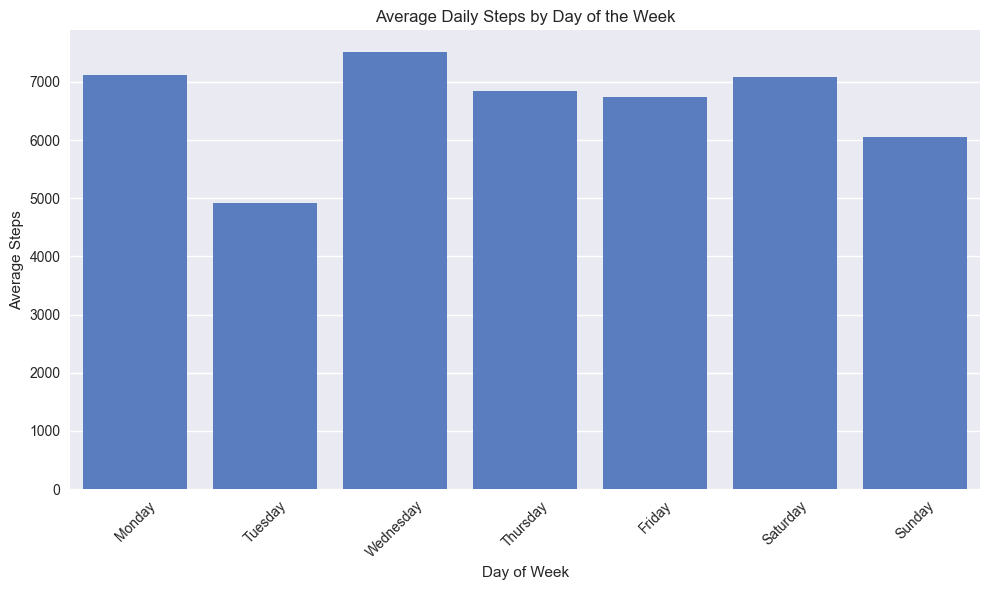

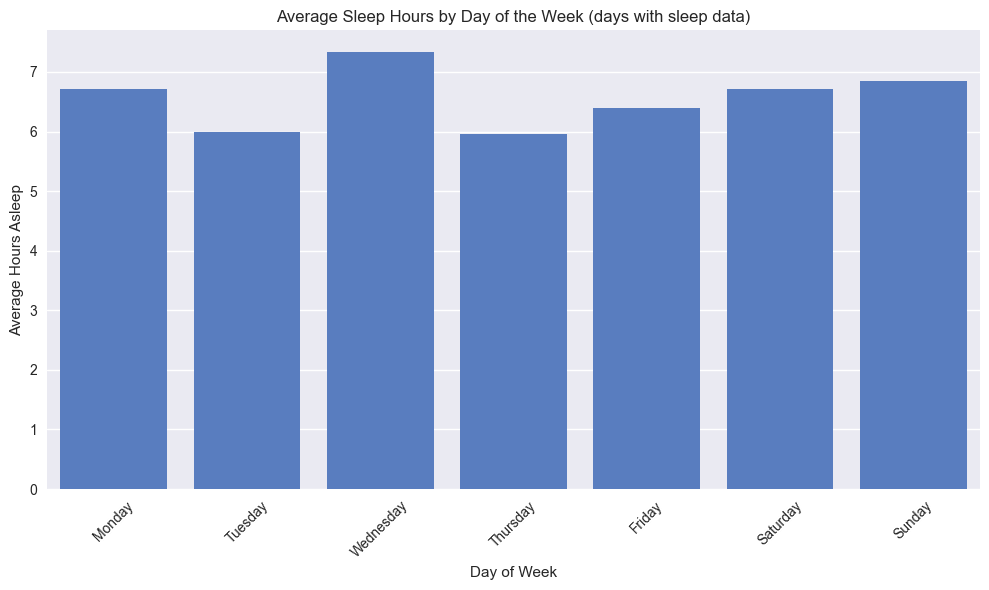

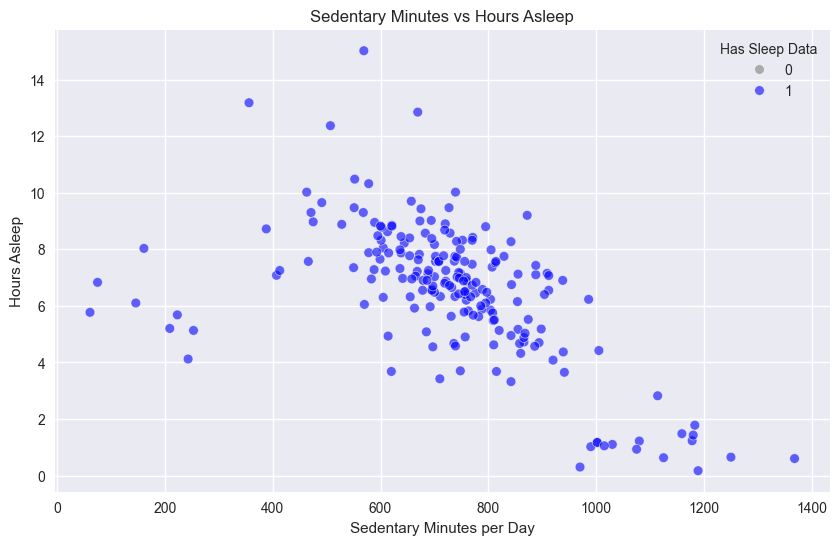

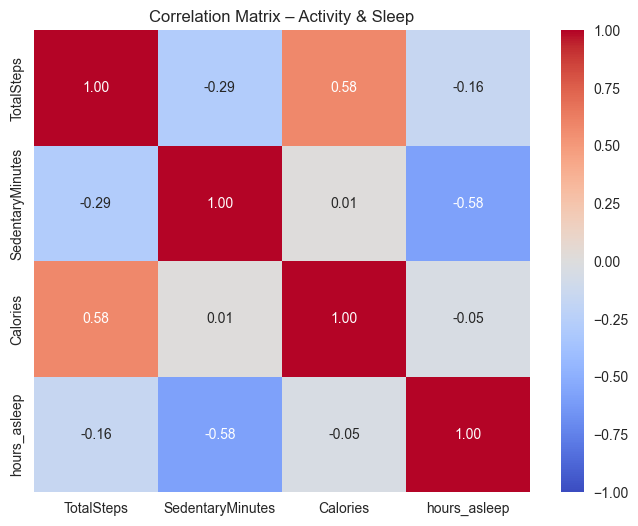

: 

In [ ]:
# Plot 1: Average steps by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_summary.index, y='TotalSteps', data=weekday_summary)
plt.title('Average Daily Steps by Day of the Week')
plt.ylabel('Average Steps')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Average sleep hours by weekday (only days with data)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_summary.index, y='hours_asleep', data=weekday_summary)
plt.title('Average Sleep Hours by Day of the Week (days with sleep data)')
plt.ylabel('Average Hours Asleep')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter – Sedentary minutes vs Sleep hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SedentaryMinutes', y='hours_asleep', data=df, alpha=0.6, hue='has_sleep', palette={0: 'gray', 1: 'blue'})
plt.title('Sedentary Minutes vs Hours Asleep')
plt.xlabel('Sedentary Minutes per Day')
plt.ylabel('Hours Asleep')
plt.legend(title='Has Sleep Data')
plt.show()

# Plot 4: Correlation heatmap (only numeric columns with sleep)
corr_cols = ['TotalSteps', 'SedentaryMinutes', 'Calories', 'hours_asleep']
corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix – Activity & Sleep')
plt.show()

Summary of Key Trends for Bellabeat

Low overall activity
Average ~6,547 steps/day (well below 10,000 goal). Even on best days (Wednesday) only ~7,500 steps.
High sedentary behavior
~16–17 hours sedentary most days — major opportunity for movement reminders.
Insufficient / inconsistent sleep
Average 6.56 hours (below ideal 7–9 hrs). Sleep is better on days when users track it (and are more active).
Weekday vs Weekend
Mid-week (especially Wednesday) shows best activity + sleep balance.
Tuesday is an outlier (very low activity — worth investigating in your data if it's real or a data quirk).
Strong link between activity and sleep tracking
Days with sleep data = higher activity → Bellabeat can emphasize "wear overnight for better insights" to improve overall usage.

Top 3 High-Level Recommendations for Bellabeat

Target low-activity & low-sleep users with personalized notifications
Use app reminders: mid-week movement prompts (e.g., "Walk 2,000 more steps today for better rest tonight") and evening wind-down alerts.
Promote overnight wear of Leaf / Time tracker
Marketing angle: "Track sleep to unlock your full wellness picture — better sleep = more energy = more activity." Highlight cycle/mindfulness features tied to sleep quality.
Focus marketing on mid-week motivation & weekend recovery
Campaigns: "Wednesday Warrior" challenges (steps + sleep goals) + "Weekend Reset" mindfulness content. Differentiate from generic trackers by focusing on women's holistic health (stress, cycle, rest).